### Try to write as short a code as possible without a pile of cycles. Use numpy and pandas for this

## Import libraries here

In [332]:
%matplotlib inline
%pylab inline
import numpy as np

import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.image as mimg
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web 

Populating the interactive namespace from numpy and matplotlib


## Define a function to generate stock data

** Function arguments:** 
* start date, datetime
* period, days
* start price, rubles
* stock volatility ( from (0,1) ). Stock price variability over time, float

Try to design your own arguments (**bonus reward**)

**Rules:**
* Use Gaussian distribution for price sampling
* Generated data should be "similar" to real stock data
* A signal about the next price appears every 1 second
* Function also should generate volume for every period


In [333]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

class myData:   
    def priceND(price):
        x = np.arange(-13, 8)
        xU = x + (0.5)
        xL = x - (0.5)       
        PiND = ss.norm.cdf(xU, scale = price) - ss.norm.cdf(xL, scale = price)
        PiND = PiND / PiND.sum() #normalize the probabilities so their sum is 1
        nums = np.random.choice(x, size = 10000, p = PiND)
        #plt.hist(nums, bins = len(x))
        return (PiND * 100)
    
    def volumeND(volume):
        x = np.arange(-10, 11)
        xU = x + (0.5)
        xL = x - (0.5)
        VoND = ss.norm.cdf(xU, scale = volume) - ss.norm.cdf(xL, scale = volume)
        VoND = VoND / VoND.sum()  #normalize the probabilities so their sum is 1
        nums = np.random.choice(x, size = 10000, p = VoND)
        #plt.hist(nums, bins = len(x))
        return (VoND * 50)
    
    def volatility (volatility):
        value = volatility
        ps = [value]
        for i in range(20):
            value += np.random.normal(.1)
            ps.append(value)
        #plt.plot(np.arange(len(ps)), ps) 
        return (ps)

In [334]:
dates = pd.date_range('20150905',periods=21)
df = pd.DataFrame(np.random.randn(21,3),index=dates,columns=list('ABC'))
df['Date'] = dates

df['Days'] = ['Mon','Tue','Wen','The','Fri',
              'Mon','Tue','Wen','The','Fri',
              'Mon','Tue','Wen','The','Fri',
              'Mon','Tue','Wen','The','Fri',
              'Mon']

df.rename(columns={ 'A': 'Price',
                    'B': 'Volume',
                    'C': 'Stock Volatility'
                    }, inplace=True)

sec = pd.date_range("10:00", "11:40", freq="5Min").time
df['Second Time'] = sec

df['Price'] = myData.priceND(3)
df['Volume'] = myData.volumeND(5)
df['Stock Volatility'] = myData.volatility(5) 
df

,Price,Volume,Stock Volatility,Date,Days,Second Time
2015-09-05,0.001213,0.562712,5.000000,2015-09-05,Mon,10:00:00
2015-09-06,0.004805,0.821807,4.561709,2015-09-06,Tue,10:05:00
2015-09-07,0.017048,1.153293,4.129015,2015-09-07,Wen,10:10:00
2015-09-08,0.054172,1.555231,3.637844,2015-09-08,The,10:15:00
2015-09-09,0.154186,2.015283,3.819379,2015-09-09,Fri,10:20:00
2015-09-10,0.393082,2.509360,3.337244,2015-09-10,Mon,10:25:00
2015-09-11,0.897624,3.002450,3.787304,2015-09-11,Tue,10:30:00
2015-09-12,1.836044,3.452031,3.832010,2015-09-12,Wen,10:35:00
2015-09-13,3.363970,3.813815,2.298955,2015-09-13,The,10:40:00
2015-09-14,5.520832,4.048840,0.895434,2015-09-14,Fri,10:45:00


In [335]:
myData.volumeND(5)

array([ 0.56271201,  0.82180737,  1.15329274,  1.55523076,  2.01528253,
        2.50935974,  3.00245042,  3.45203141,  3.81381515,  4.04883959,
        4.13035658,  4.04883959,  3.81381515,  3.45203141,  3.00245042,
        2.50935974,  2.01528253,  1.55523076,  1.15329274,  0.82180737,
        0.56271201])

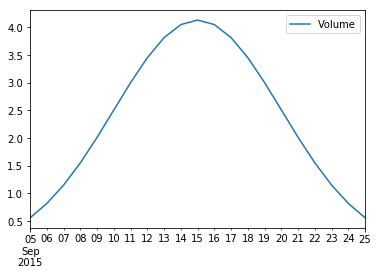

In [336]:
df[['Volume']].plot()

In [337]:
myData.priceND(3)

array([  1.21320006e-03,   4.80534944e-03,   1.70479044e-02,
         5.41721455e-02,   1.54186103e-01,   3.93082164e-01,
         8.97624466e-01,   1.83604422e+00,   3.36396993e+00,
         5.52083161e+00,   8.11601294e+00,   1.06873167e+01,
         1.26061859e+01,   1.33195215e+01,   1.26061859e+01,
         1.06873167e+01,   8.11601294e+00,   5.52083161e+00,
         3.36396993e+00,   1.83604422e+00,   8.97624466e-01])

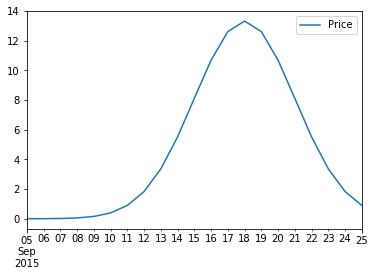

In [338]:
df[['Price']].plot()

In [339]:
df

,Price,Volume,Stock Volatility,Date,Days,Second Time
2015-09-05,0.001213,0.562712,5.000000,2015-09-05,Mon,10:00:00
2015-09-06,0.004805,0.821807,4.561709,2015-09-06,Tue,10:05:00
2015-09-07,0.017048,1.153293,4.129015,2015-09-07,Wen,10:10:00
2015-09-08,0.054172,1.555231,3.637844,2015-09-08,The,10:15:00
2015-09-09,0.154186,2.015283,3.819379,2015-09-09,Fri,10:20:00
2015-09-10,0.393082,2.509360,3.337244,2015-09-10,Mon,10:25:00
2015-09-11,0.897624,3.002450,3.787304,2015-09-11,Tue,10:30:00
2015-09-12,1.836044,3.452031,3.832010,2015-09-12,Wen,10:35:00
2015-09-13,3.363970,3.813815,2.298955,2015-09-13,The,10:40:00
2015-09-14,5.520832,4.048840,0.895434,2015-09-14,Fri,10:45:00


<function matplotlib.pyplot.show>

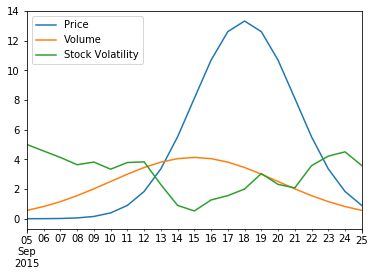

In [340]:
df.plot()
plt.show

In [341]:
from matplotlib.finance import candlestick_ohlc   
import matplotlib.dates as mdates  

In [342]:
rsac = df['Price'].resample('1D').ohlc()      
rsac.reset_index(inplace=True)                      
print(rsac.head())


       index      open      high       low     close
0 2015-09-05  0.001213  0.001213  0.001213  0.001213
1 2015-09-06  0.004805  0.004805  0.004805  0.004805
2 2015-09-07  0.017048  0.017048  0.017048  0.017048
3 2015-09-08  0.054172  0.054172  0.054172  0.054172
4 2015-09-09  0.154186  0.154186  0.154186  0.154186


In [343]:
rsac = df['Volume'].resample('1D').ohlc()      
rsac.reset_index(inplace=True)                      
print(rsac.head())

       index      open      high       low     close
0 2015-09-05  0.562712  0.562712  0.562712  0.562712
1 2015-09-06  0.821807  0.821807  0.821807  0.821807
2 2015-09-07  1.153293  1.153293  1.153293  1.153293
3 2015-09-08  1.555231  1.555231  1.555231  1.555231
4 2015-09-09  2.015283  2.015283  2.015283  2.015283


In [344]:
rsac = df['Stock Volatility'].resample('1D').ohlc()      
rsac.reset_index(inplace=True)                      
print(rsac.head())

       index      open      high       low     close
0 2015-09-05  5.000000  5.000000  5.000000  5.000000
1 2015-09-06  4.561709  4.561709  4.561709  4.561709
2 2015-09-07  4.129015  4.129015  4.129015  4.129015
3 2015-09-08  3.637844  3.637844  3.637844  3.637844
4 2015-09-09  3.819379  3.819379  3.819379  3.819379


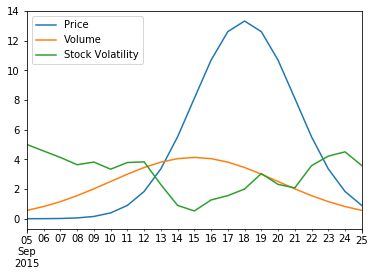

,Price,Volume,Stock Volatility,Date,Days,Second Time
2015-09-05,0.001213,0.562712,5.000000,2015-09-05,Mon,10:00:00
2015-09-06,0.004805,0.821807,4.561709,2015-09-06,Tue,10:05:00
2015-09-07,0.017048,1.153293,4.129015,2015-09-07,Wen,10:10:00
2015-09-08,0.054172,1.555231,3.637844,2015-09-08,The,10:15:00
2015-09-09,0.154186,2.015283,3.819379,2015-09-09,Fri,10:20:00


In [345]:
df.plot()
plt.show()

df.head()

## Define plot functions 

**Rules:**
* All plot functions input arguments include generated data!
* Print labels, title, legend
* Change figure size
* Create the most effective view of final plot

### Simple plot

**Arguments:**
* from, datetime
* to, datetime
* simple moving average, bool (https://en.wikipedia.org/wiki/Moving_average). 
    If True - plot SMA on the same figure

Example in "./sp.png"

In [346]:
##Some example
plt.figure(figsize=(10,10))
plt.imshow(mimg.imread("./sp.png"))

FileNotFoundError: [Errno 2] No such file or directory: './sp.png'

Populating the interactive namespace from numpy and matplotlib


<Container object of 21 artists>

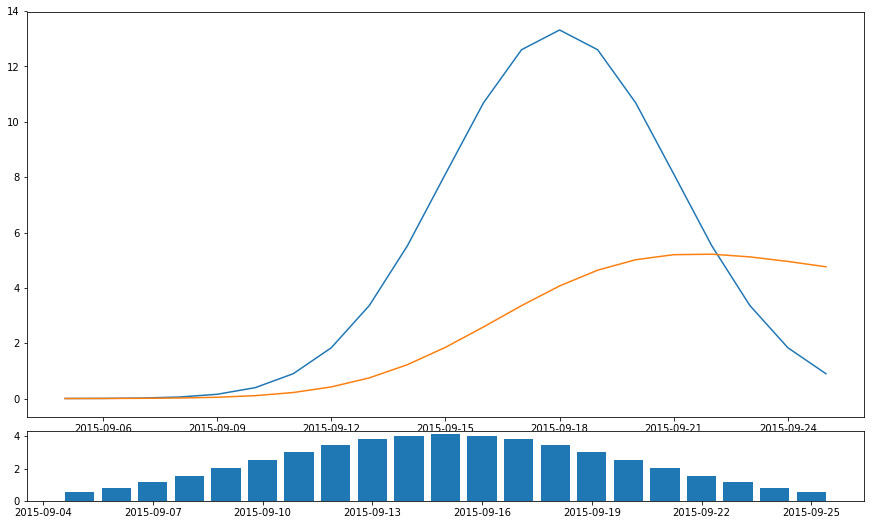

In [347]:
%pylab inline
df['100ma']=df['Price'].rolling(window=100 , min_periods=0).mean()  # Moving Average
pylab.rcParams['figure.figsize'] = (15, 9)
ax1 = plt.subplot2grid((6,1),(0,0) , rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0) , rowspan=1, colspan=1)

ax1.plot(df.index , df['Price'])
ax1.plot(df.index , df['100ma'])
ax2.bar(df.index , df['Volume'])

       index       open       high        low      close
0 2015-09-05   0.001213   0.017048   0.001213   0.017048
1 2015-09-08   0.054172   0.393082   0.054172   0.393082
2 2015-09-11   0.897624   3.363970   0.897624   3.363970
3 2015-09-14   5.520832  10.687317   5.520832  10.687317
4 2015-09-17  12.606186  13.319522  12.606186  12.606186


,Price,Volume,Stock Volatility,Date,Days,Second Time,100ma,Price Open
2015-09-05,0.001213,0.562712,5.000000,2015-09-05,Mon,10:00:00,0.001213,1.471854e-07
2015-09-06,0.004805,0.821807,4.561709,2015-09-06,Tue,10:05:00,0.003009,1.446062e-06
2015-09-07,0.017048,1.153293,4.129015,2015-09-07,Wen,10:10:00,0.007689,1.310782e-05
2015-09-08,0.054172,1.555231,3.637844,2015-09-08,The,10:15:00,0.019310,1.046045e-04
2015-09-09,0.154186,2.015283,3.819379,2015-09-09,Fri,10:20:00,0.046285,7.136495e-04
2015-09-10,0.393082,2.509360,3.337244,2015-09-10,Mon,10:25:00,0.104084,4.091375e-03
2015-09-11,0.897624,3.002450,3.787304,2015-09-11,Tue,10:30:00,0.217447,1.951860e-02
2015-09-12,1.836044,3.452031,3.832010,2015-09-12,Wen,10:35:00,0.419772,7.707198e-02
2015-09-13,3.363970,3.813815,2.298955,2015-09-13,The,10:40:00,0.746905,2.512566e-01
2015-09-14,5.520832,4.048840,0.895434,2015-09-14,Fri,10:45:00,1.224298,6.759141e-01


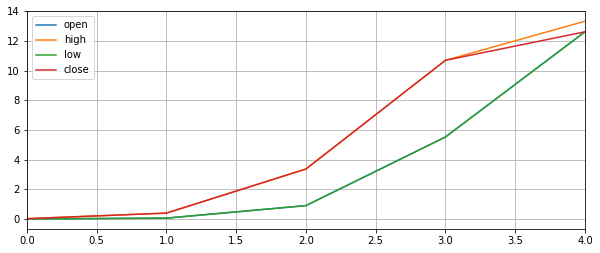

In [348]:
rsac = df['Price'].resample('3D').ohlc()      # Plot Price by OHLC
rsac.reset_index(inplace=True)                      
PriceOHLC = (rsac.head())
print (PriceOHLC)
pylab.rcParams['figure.figsize'] = (10, 4)
PriceOHLC[['open','high' , 'low','close']].plot(grid = True)
df['Price Open'] =  (df['Price'] * df['100ma'])/10
plt.show
df

       index      open      high       low     close
0 2015-09-05  0.562712  1.153293  0.562712  1.153293
1 2015-09-08  1.555231  2.509360  1.555231  2.509360
2 2015-09-11  3.002450  3.813815  3.002450  3.813815
3 2015-09-14  4.048840  4.130357  4.048840  4.048840
4 2015-09-17  3.813815  3.813815  3.002450  3.002450


<function matplotlib.pyplot.show>

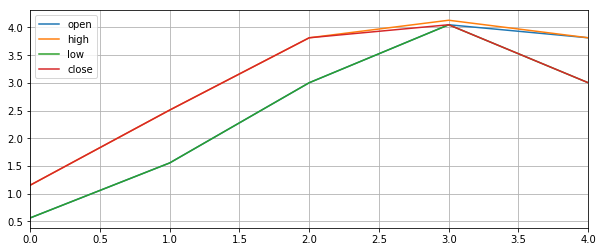

In [349]:
rsac = df['Volume'].resample('3D').ohlc()      # Plot Volume by OHLC
rsac.reset_index(inplace=True)                      
VolumeOHLC = (rsac.head())
print (VolumeOHLC)
pylab.rcParams['figure.figsize'] = (10, 4)
VolumeOHLC[['open','high' , 'low','close']].plot(grid = True)
plt.show


       index      open      high       low     close
0 2015-09-05  5.000000  5.000000  4.129015  4.129015
1 2015-09-08  3.637844  3.819379  3.337244  3.337244
2 2015-09-11  3.787304  3.832010  2.298955  2.298955
3 2015-09-14  0.895434  1.265570  0.525044  1.265570
4 2015-09-17  1.557383  3.044019  1.557383  3.044019


<function matplotlib.pyplot.show>

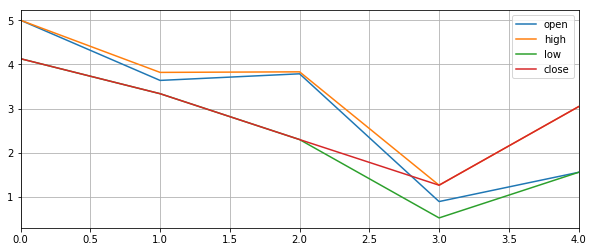

In [350]:
rsac = df['Stock Volatility'].resample('3D').ohlc()     # Plot Stock Volatility by OHLC 
rsac.reset_index(inplace=True)                      
VolumeOHLC = (rsac.head())
print (VolumeOHLC)
pylab.rcParams['figure.figsize'] = (10, 4)
VolumeOHLC[['open','high' , 'low','close']].plot(grid = True)
plt.show

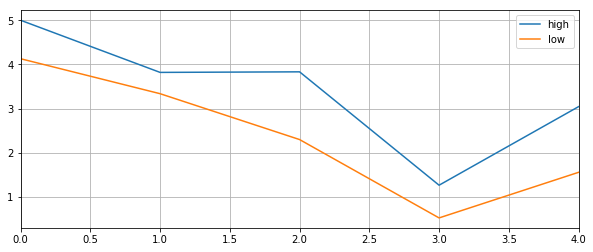

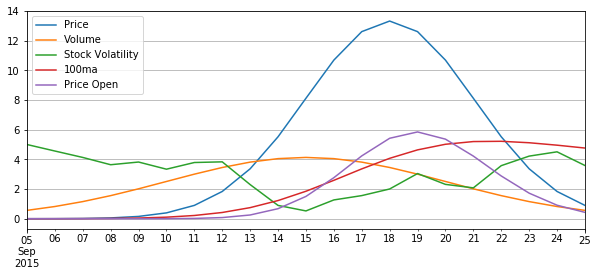

,Price,Volume,Stock Volatility,Date,Days,Second Time,100ma,Price Open
2015-09-05,0.001213,0.562712,5.000000,2015-09-05,Mon,10:00:00,0.001213,1.471854e-07
2015-09-06,0.004805,0.821807,4.561709,2015-09-06,Tue,10:05:00,0.003009,1.446062e-06
2015-09-07,0.017048,1.153293,4.129015,2015-09-07,Wen,10:10:00,0.007689,1.310782e-05
2015-09-08,0.054172,1.555231,3.637844,2015-09-08,The,10:15:00,0.019310,1.046045e-04
2015-09-09,0.154186,2.015283,3.819379,2015-09-09,Fri,10:20:00,0.046285,7.136495e-04


In [351]:
pylab.rcParams['figure.figsize'] = (10, 4)
VolumeOHLC[['high' , 'low']].plot(grid = True)
plt.show

df.plot(grid = True)
plt.show()
df.head()

### Candle plot

It's a standart candle stock plot

**Arguments:**
* from, datetime
* to, datetime

**Rules:**
* Use 1 hour as time period for 1 candle (as in example)

Example in 'cp.jpg'. All title and labels are example. Use your own.

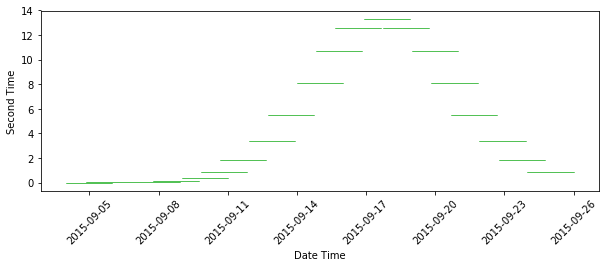

In [363]:
a = df['Price'].resample('10H').ohlc()                    
a.reset_index(inplace=True)                                               

a['index']= a['index'].map(mdates.date2num)                  
a['index'] =  a['index'] 
b = df['Volume'].resample('10H').sum()                        

ax1 = plt.subplot2grid((6,1),(0,0) , rowspan=5, colspan=2 )    
candlestick_ohlc(ax1 , a.values, width=2 , colorup='#53c156', colordown='#ff1717')

ax1.xaxis_date()                                             
candlestick_ohlc(ax1 , a.values, width=2 , colorup='#53c156', colordown='#ff1717')
                           
plt.xticks(rotation=45)
plt.ylabel('Second Time')
plt.xlabel('Date Time')
plt.show()